## Decision Trees

- if/else 질문들로 이뤄진 계층구조  

-> 질문과 노드를 데이터로 어떻게 구성할 것인가?

- 직관적인 형태라 이해가 쉬움

### Learning

- 모든 가능한 트리를 찾아서 최적의 것을 선택하면 됨  
-> 그리디 전략을 활용한 휴리스틱 알고리즘으로 최적의 것을 찾아야 함.

- $D = {(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)}$가 있을 때 결과의 impurity가 최소화하는 방향으로 노드를 분할, 해당 과정을 반복


### How to determine the best split?(classification)
- impurity(불순도)가 작은 노드가 선호됨.

- impurity가 작다 -> 노드로 인해 데이터가 극명하게 나뉜다.
    - ex: 10개의 데이터가 A: 9, B: 1로 갈리면 impurity가 낮은 거임.

- impurity 측정법
    $p(j|t)$가 노드 t에서의 클래스 j의 비중이라 했을 때

    $$GINI(t) = 1 - \sum_j [p(j|t)]^2$$

    $$Entropy(t) = - \sum_j p(j|t)logp(j|t)$$

    - impurity를 측정하니까 1에서 $p(j|t)$를 빼거나 음의 부호를 붙이는 것임



- Gain = P(분할 전 impurity) - M(분할 후 impurity)가 가장 커지는 분기 채택
    - M의 경우에는 각 자식 노드의 impurity 합(또는 가중합)으로 계산


### For Regression
회귀 시 Gain 측정  
-> 부모 노드 레이블 값의 분산보다 자식 노드들의 가중 평균 분산이 줄어들면 Gain이 큼

### Prediction

- Classification  
    : 리프 도착 시 우세한 클래스

- Regression  
    : 리프 도착 시 타겟값들의 평균


### Prevent overfitting
모든 리프 노드들을 pure하게 만드는 것은 overfitting의 위험이 매우 높음  
-> overfitting 방지 전략이 필요

1. Pre-pruning  
- 사전에 트리 생성을 억제하는 것
- 루트부터 리프까지의 거리, 최소 리프 노드 개수, 최대 리프 노드 개수 등으로 조절

2. Post-pruning  
- 사후에 노드를 삭제하는 것
- 시간이 더 걸림

### Practice

#### Clasification

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


cancer = load_breast_cancer()
X_train, X_test, y_train, y_test= train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [2]:
from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [4]:
from sklearn.metrics import accuracy_score


y_train_hat= clf.predict(X_train)
print('train accuracy: %.5f'%accuracy_score(y_train, y_train_hat))
y_test_hat= clf.predict(X_test)
print('test accuracy: %.5f'%accuracy_score(y_test, y_test_hat))

train accuracy: 1.00000
test accuracy: 0.93706


In [7]:
# pre-pruning
import pandas as pd


training_accuracy = []
test_accuracy = []

m_settings = [1, 2, 5, 7, 10, 20]
for m in m_settings:
    # build the model
    clf = DecisionTreeClassifier(min_samples_leaf=m, random_state=0)
    clf.fit(X_train, y_train)
    
    # accuracy on the training set
    y_train_hat = clf.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_train_hat))

    # accuracy on the test set (generalization)
    y_test_hat = clf.predict(X_test)
    test_accuracy.append(accuracy_score(y_test, y_test_hat))

pd.DataFrame({"min_sample_leaf": m_settings, "train accuracy": training_accuracy, "test_accuracy": test_accuracy})

,min_sample_leaf,train accuracy,test_accuracy
0,1,1.000000,0.937063
1,2,0.990610,0.937063
2,5,0.976526,0.937063
3,7,0.962441,0.951049
4,10,0.962441,0.951049
5,20,0.946009,0.916084


[Text(0.5833333333333334, 0.9, 'x[20] <= 16.795\ngini = 0.46786\nsamples = 426\nvalue = [159, 267]'),
 Text(0.4166666666666667, 0.7, 'x[27] <= 0.13595\ngini = 0.16056\nsamples = 284\nvalue = [25, 259]'),
 Text(0.5, 0.8, 'True  '),
 Text(0.3333333333333333, 0.5, 'x[1] <= 21.56\ngini = 0.03124\nsamples = 252\nvalue = [4, 248]'),
 Text(0.16666666666666666, 0.3, 'x[10] <= 0.40995\ngini = 0.00948\nsamples = 210\nvalue = [1, 209]'),
 Text(0.08333333333333333, 0.1, 'gini = 0.0\nsamples = 190\nvalue = [0, 190]'),
 Text(0.25, 0.1, 'gini = 0.095\nsamples = 20\nvalue = [1, 19]'),
 Text(0.5, 0.3, 'x[18] <= 0.01888\ngini = 0.13265\nsamples = 42\nvalue = [3, 39]'),
 Text(0.4166666666666667, 0.1, 'gini = 0.255\nsamples = 20\nvalue = [3, 17]'),
 Text(0.5833333333333334, 0.1, 'gini = 0.0\nsamples = 22\nvalue = [0, 22]'),
 Text(0.5, 0.5, 'gini = 0.45117\nsamples = 32\nvalue = [21, 11]'),
 Text(0.75, 0.7, 'x[21] <= 23.375\ngini = 0.10633\nsamples = 142\nvalue = [134, 8]'),
 Text(0.6666666666666667, 0.8, 

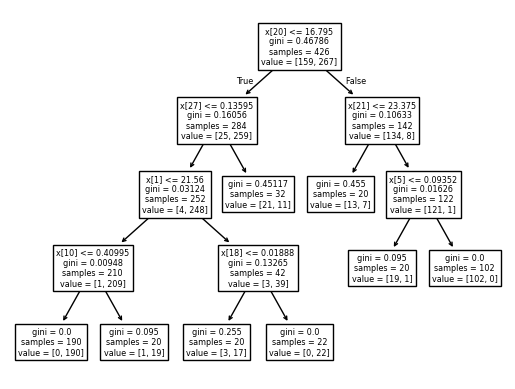

In [8]:
from sklearn import tree


tree.plot_tree(clf, precision=5)

In [9]:
# feature importance
clf.feature_importances_

array([0.00000000e+00, 1.86436575e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.01021007e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.42187999e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.82508484e-03, 0.00000000e+00,
       8.30650904e-01, 2.40602159e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.39556220e-01,
       0.00000000e+00, 0.00000000e+00])